# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: (tu nombre)  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [39]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-19 23:59:00--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-19 23:59:01--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv.2’

instagram_posts.csv 100%[===================>]  17.

In [40]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [43]:
df.shape

(200, 64)

In [44]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI

In [9]:
df["type"].value_counts ()

,count
type,
Video,86
Sidecar,83
Image,31


In [11]:
df ["timestamp"] = pd.to_datetime (df ["timestamp"])

In [45]:
df["timestamp"].max()

'2025-05-21T21:01:28.000Z'

In [46]:
df["timestamp"].min()

'2025-05-05T00:59:11.000Z'

In [47]:
df["likesCount"].sort_values(ascending=False)

,likesCount
138,1927755
184,1886670
175,1812728
176,1734008
3,1590803
...,...
57,98256
125,98127
55,84260
1,83824


In [48]:
df["likesCount"].max()

1927755

In [49]:
df[df["likesCount"]==df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
138,https://www.instagram.com/f1/,3630879158915563525,f1,https://www.instagram.com/p/DJjeVuZiAAF/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


In [50]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1



## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [51]:
import os

In [52]:
os.environ["OPENAI_API_KEY"] =

from openai import OpenAI

client = OpenAI()

In [53]:
from openai import OpenAI

client = OpenAI()


In [54]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [55]:
call_llm("qué día es hoy?")

'Hoy es 27 de octubre de 2023. ¿En qué puedo ayudarte?'

In [56]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['sentimiento'] = sample['caption_clean'].apply(classify_sentiment)


In [57]:
sample['sentimiento'].value_counts()


,count
sentimiento,
positivo,9
negativo,1


<Axes: xlabel='sentimiento'>

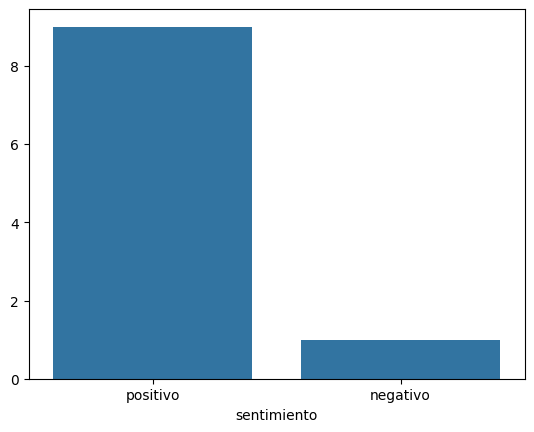

In [58]:
import seaborn as sns
sns.barplot(x=sample['sentimiento'].value_counts().index, y=sample['sentimiento'].value_counts().values)

**Sección 4 (Temas)**
Haga lo mismo con sentidimiento con tipo de contenido y tema

9. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
10. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
11. Para el tema dominante, proporciona dos insights accionables.


In [59]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadisticas', 'entre_bastidores' o 'tecnologia_vehiculos' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['topic'] = sample['caption_clean'].apply(classify_sentiment)


In [60]:
sample['topic'].value_counts()

,count
topic,
entre_bastidores,6
resultados_estadisticas,4


In [65]:
pd.crosstab(sample['topic'], sample['type'])

type,Image,Sidecar,Video
topic,,,
entre_bastidores,0,1,5
resultados_estadisticas,2,2,0


<Axes: xlabel='type', ylabel='topic'>

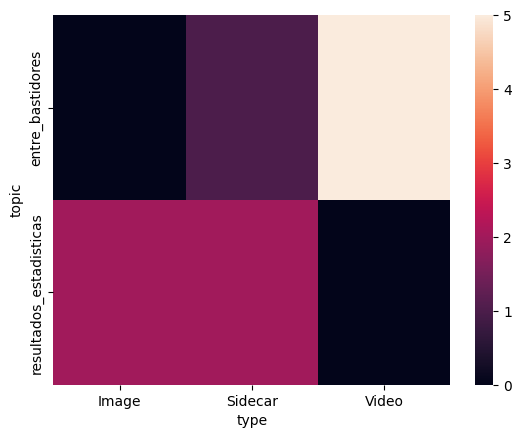

In [63]:
sns.heatmap(pd.crosstab(sample['topic'], sample['type']))


## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


In [68]:
call_llm("""Describe cada cluster en una frase (actividad y tono). damelo como una lista de python.topic entre_bastidores resultados_estadisticas
type
Image 0 2
Sidecar 1 2
video 5 0
""")

'Aquí tienes una descripción de cada cluster en forma de lista de Python, con la actividad y el tono:\n\n```python\nclusters = [\n    {"tipo": "Image", "actividad": "Interacción visual", "tono": "Informativo"},\n    {"tipo": "Sidecar", "actividad": "Asistencia o apoyo", "tono": "Colaborativo"},\n    {"tipo": "video", "actividad": "Contenido audiovisual", "tono": "Entretenido"}\n]\n```\n\n¿Te gustaría agregar o modificar algo más?'


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


In [71]:
lista_tonos  = [   {"tipo": "Image", "actividad": "Interacción visual", "tono": "Informativo"},  {"tipo": "Sidecar", "actividad": "Asistencia o apoyo", "tono": "Colaborativo"},   {"tipo": "video", "actividad": "Contenido audiovisual", "tono": "Entretenido"}]

In [73]:
def generar_caption(topic,tone):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for lista in  lista_tonos:
  print(generar_caption(lista["actividad"],lista["tono"]))
  print("__________")


La interacción visual es clave en la comunicación digital. Utilizar imágenes, videos y gráficos efectivos puede aumentar el interés y la comprensión de tu audiencia. Atrae y retiene la atención a través de elementos visuales impactantes.
__________
La verdadera fuerza de una comunidad se mide en la ayuda que brindamos unos a otros. Juntos somos más, apoyándonos en los momentos difíciles y celebrando los logros. ¿Cómo puedes aportar hoy a alguien más?
__________
¡Dale vida a tus ideas! 🎥✨ El contenido audiovisual es la chispa que enciende la creatividad. ¡Deja que tus historias brillen en pantalla y sorprendan a todos! ¿Listo para captar miradas y corazones? 💖🎉
__________



### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.
